# Illustration of Uniform Quantization

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* Uniform scalar quantization of a sinusoidal signal

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import shutil
import numpy as np

In [4]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

matplotlib.rc('figure', figsize=(18, 6) )

Generate artificial signal
$$
b[k] = \sin\left(2\pi\frac{2k}{f_s}\right),\qquad k = 0,\ldots,f_s
$$

In [5]:
sr = 22050 # sampling rate
T = 1.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = np.sin(2*np.pi*2*t)                # pure sine wave at 2 Hz

Uniform Quantization. The quantizer is given by
$$
\bar{b}[k] = \mathrm{sign}(b[k])\cdot \Delta \cdot \left(\left\lfloor\frac{|b[k]|}{\Delta}\right\rfloor+\frac{1}{2}\right)
$$
where $\lfloor x \rfloor$ denotes the larges integer smaller or equal than $x$.

In [6]:
# Sample to 4 bit ... 16 quantization levels
w = 4

# fix x_max based on the current signal, leave some tiny room
x_max = np.max(x) + 1e-10
Delta_x = x_max / (2**(w-1))

xh_max = (2**w-1)*Delta_x/2

# Quantize
xh_uniform_midrise = np.sign(x)*Delta_x*(np.floor(np.abs(x)/Delta_x)+0.5) 

# saturation
xh_uniform_midrise[np.where(x > x_max)] = xh_max
xh_uniform_midrise[np.where(x < -x_max)] = -xh_max

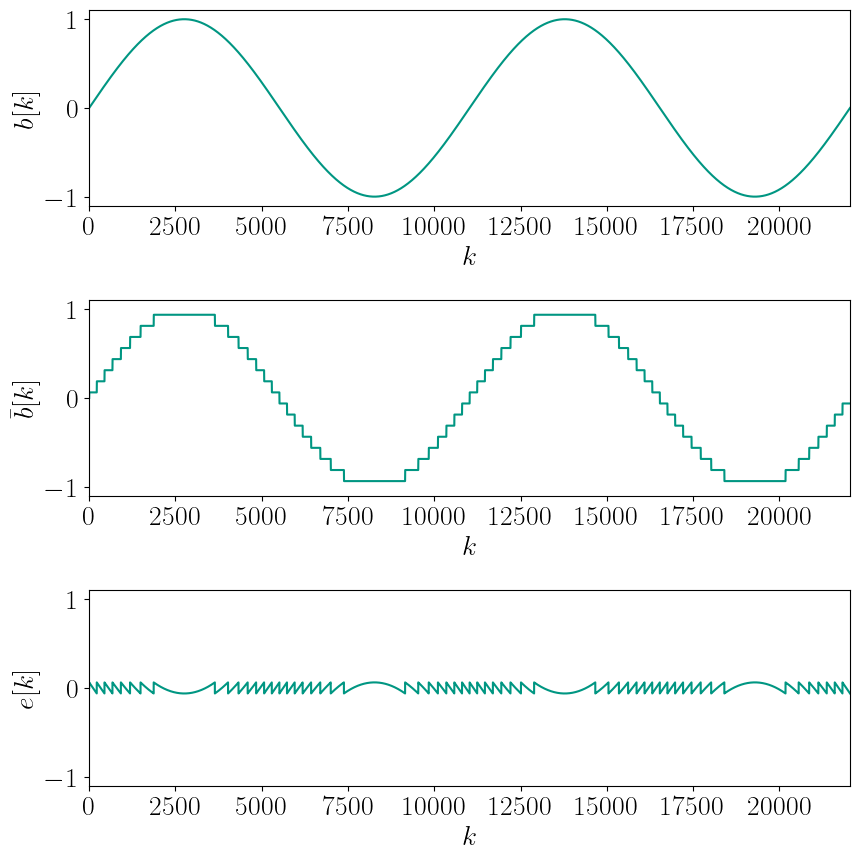

In [10]:
plt.figure(figsize=(9, 9))
plt.subplot(3,1,1)
plt.plot(range(len(t)),x, c=(0,150/255, 130/255))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Original')
plt.xlabel('$k$')
plt.ylabel('$b[k]$')
plt.ylim((-1.1,+1.1))

plt.subplot(3,1,2)
plt.plot(range(len(t)),xh_uniform_midrise, c=(0,150/255, 130/255))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Quantized')
plt.xlabel('$k$')
plt.ylabel(r'$\bar{b}[k]$')
plt.ylim((-1.1,+1.1))

plt.subplot(3,1,3)
plt.plot(range(len(t)),xh_uniform_midrise - x, c=(0,150/255, 130/255))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Quantization error signal')
plt.xlabel('$k$')
plt.ylabel('$e[k]$')
plt.ylim((-1.1,+1.1))

plt.tight_layout()
plt.show()
#plt.savefig('figure_Sine_quantizer.pdf',bbox_inches='tight')